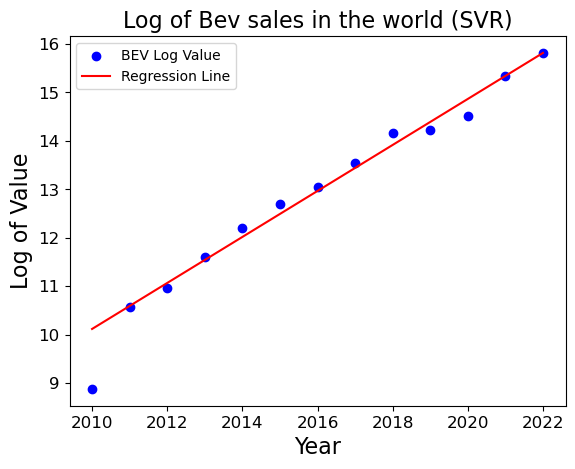

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev=df_bev.drop(['region','powertrain'],axis=1)
df_bev
import numpy as np
# Transform the data
df_bev['log_value'] = df_bev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
model = SVR(kernel= 'linear')
model.fit(df_bev[['year']], df_bev['log_value'])

plt.scatter(df_bev['year'], df_bev['log_value'], color='blue', label='BEV Log Value')
plt.plot(df_bev['year'], model.predict(df_bev[['year']]), color='red', label='Regression Line')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Log of Value',fontsize=16)
plt.title('Log of Bev sales in the world (SVR)', fontsize=16)
plt.legend()    
plt.rcParams["legend.fontsize"] = 15
# Increase font size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

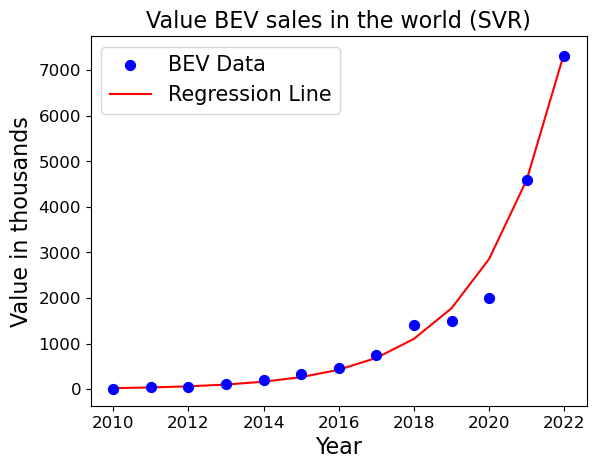

RMSE: 265078.5608503058


In [2]:
# Plot the old data and regression line
plt.scatter(df_bev['year'], df_bev['value']/1000, color='blue', marker='o', s=50, zorder=10, label='BEV Data')
# Transform the data
plt.plot(df_bev['year'], np.exp(model.predict(df_bev[['year']]))/1000, color='red', label='Regression Line')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('Value BEV sales in the world (SVR)', fontsize=16)
plt.legend()
plt.rcParams["legend.fontsize"] = 16
# Increase font size of axis labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()    
rmse = np.sqrt(mean_squared_error(df_bev['value'], np.exp(model.predict(df_bev[['year']]))))
print('RMSE:', rmse)

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[ 7377527.66779562 11858129.46007895 19059939.94516696 30635633.7174744
 49241606.00564962 79147563.40204485]


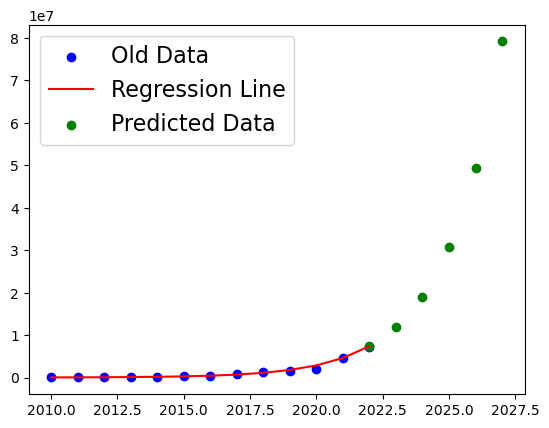

In [3]:

# Predict values for the future years
future_years = [2022,2023, 2024, 2025, 2026, 2027]
future_values = np.exp(model.predict(np.array(future_years).reshape(-1, 1)))
print(future_values)    
#plot graph showing the predicted values
plt.scatter(df_bev['year'], df_bev['value'], color='blue', label='Old Data')
plt.plot(df_bev['year'], np.exp(model.predict(df_phev[['year']])), color='red', label='Regression Line')
plt.scatter(future_years, future_values, color='green', label='Predicted Data')
plt.legend()
plt.show()

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[ 2788294.68625399  4134284.49034634  6130022.17139444  9089159.65375257
 13476757.65300061 19982375.04078554]


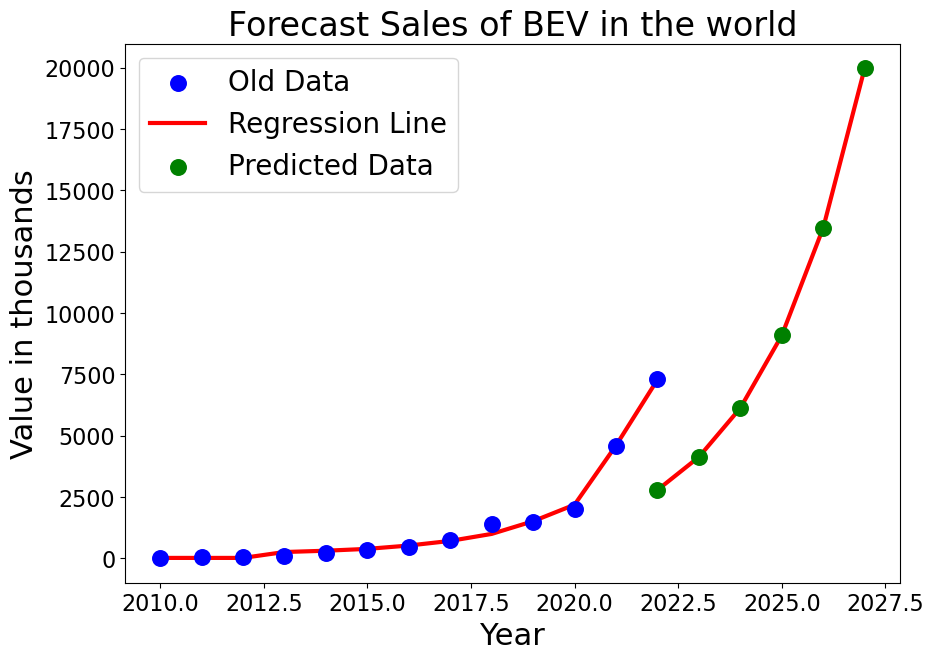

In [7]:
lstm_GBRT = np.array([20000, 20000, 20000, 260135.55, 312902.03, 388348.2, 524439.9, 712880.6, 998281.7, 1515639.2, 2189442.5, 4604273.5, 7284428.5])
actual_values_GBRT = df_bev['value'].values[-len(lstm_GBRT):]


# Predict values for the future years
future_years = [2022,2023, 2024, 2025, 2026, 2027]
future_values = np.exp(model.predict(np.array(future_years).reshape(-1, 1)))
print(future_values)    
#plot graph showing the predicted values
plt.figure(figsize=(10,7))
plt.scatter(df_bev['year'], df_bev['value']/1000, color='blue',marker='o', s=125, label='Old Data',zorder=10)
plt.plot(future_years, future_values/1000, color='red', linewidth=3)
plt.plot(df_bev['year'], lstm_GBRT/1000, color='red', label='Regression Line', linewidth=3)
plt.scatter(future_years, future_values/1000, color='green', marker='o', s=125,label='Predicted Data',zorder=10)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Forecast Sales of BEV in the world', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [32]:
future_values

array([ 7377527.66779562, 11858129.46007895, 19059939.94516696,
       30635633.7174744 , 49241606.00564962, 79147563.40204485])

C:\Users\cheth\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


[ 2788294.68625399  4134284.49034634  6130022.17139444  9089159.65375257
 13476757.65300061 19982375.04078554]


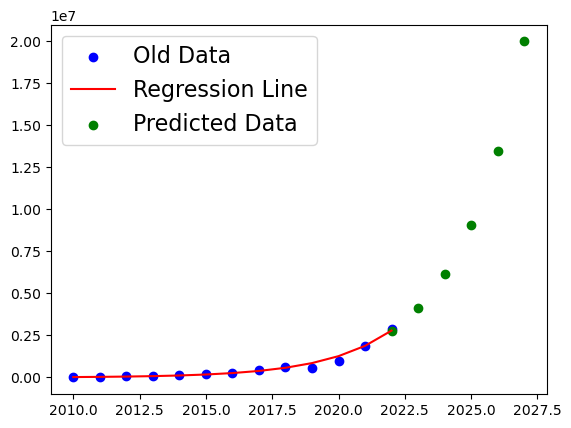

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
df=pd.read_csv("EV_WORLD.csv")
df=df.drop(['category','parameter','mode','unit'], axis=1)
df.head(25)
# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev=df_bev.drop(['region','powertrain'],axis=1)
df_phev=df_phev.drop(['region','powertrain'],axis=1)
df_phev
import numpy as np
# Transform the data
df_phev['log_value'] = df_phev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
model = SVR(kernel= 'linear')
model.fit(df_phev[['year']], df_phev['log_value'])

# Predict values for the future years
future_years = [2022,2023, 2024, 2025, 2026, 2027]
future_values = np.exp(model.predict(np.array(future_years).reshape(-1, 1)))
print(future_values)    
#plot graph showing the predicted values
plt.scatter(df_phev['year'], df_phev['value'], color='blue', label='Old Data')
plt.plot(df_phev['year'], np.exp(model.predict(df_phev[['year']])), color='red', label='Regression Line')
plt.scatter(future_years, future_values, color='green', label='Predicted Data')
plt.legend()
plt.show()

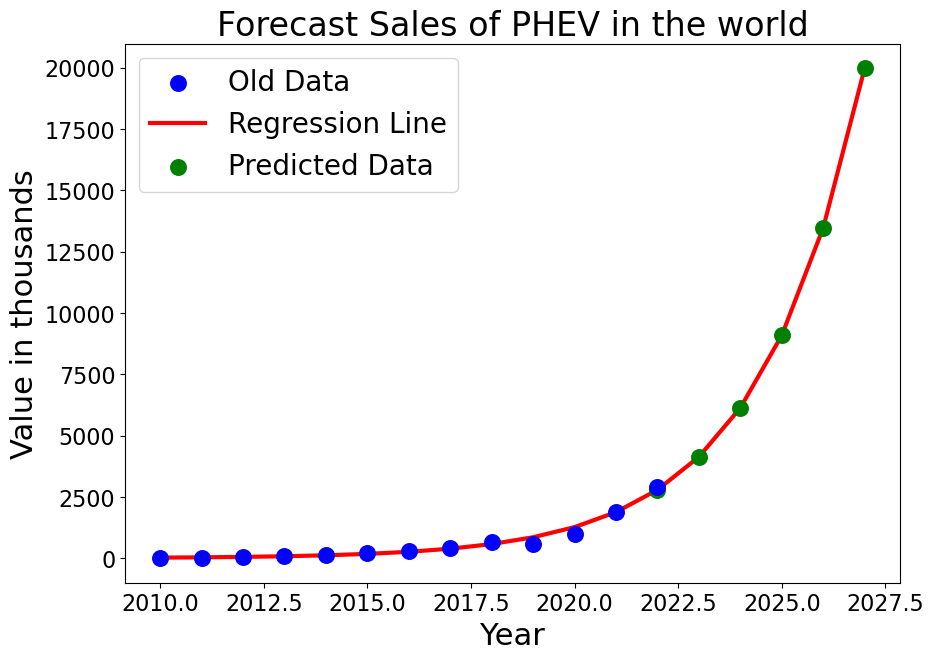

[ 2788294.68625399  4134284.49034634  6130022.17139444  9089159.65375257
 13476757.65300061 19982375.04078554]


In [6]:
#plot graph showing the predicted values
plt.figure(figsize=(10,7))
plt.scatter(df_bev['year'], df_phev['value']/1000, color='blue',marker='o', s=125, label='Old Data',zorder=10)
plt.plot(future_years, future_values/1000, color='red', linewidth=3)
plt.plot(df_bev['year'],np.exp(model.predict(df_phev[['year']]))/1000, color='red', label='Regression Line', linewidth=3)
plt.scatter(future_years, future_values/1000, color='green', marker='o', s=125,label='Predicted Data',zorder=2)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Forecast Sales of PHEV in the world', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print(future_values)

In [56]:
future_values

array([ 2788294.68625399,  4134284.49034634,  6130022.17139444,
        9089159.65375257, 13476757.65300061, 19982375.04078554])